   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

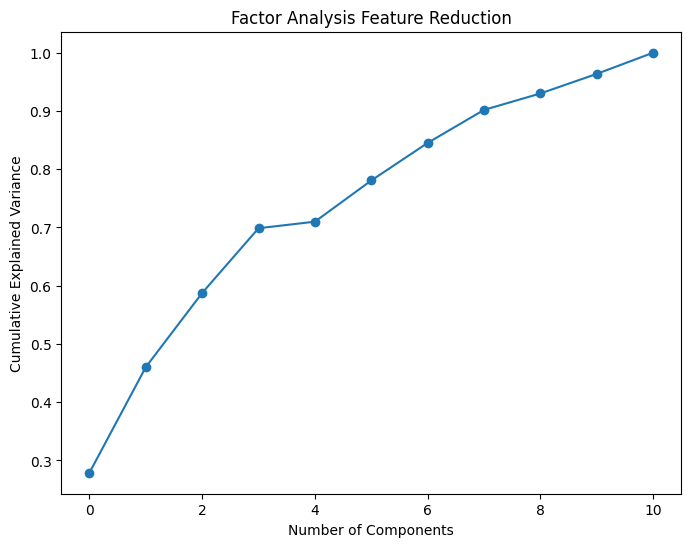

   Factor 1  Factor 2  Factor 3  Factor 4
0  0.490739 -0.338004 -0.373798 -1.564037
1  0.024327  0.679608  0.156495 -0.443005
2  0.117399  0.254484  0.041626 -0.594479
3  0.719390  0.189701 -0.428154  1.580288
4  0.490739 -0.338004 -0.373798 -1.564037

Selected Features: Index(['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], dtype='object')


In [29]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
print(df.head())

# Split data into features (X) and target (y)
X = df.drop("quality", axis=1)
y = df["quality"]


# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply Factor Analysis
n_components = 4
fa = FactorAnalysis(n_components=n_components)
X_fa = fa.fit_transform(X_scaled)


# Get covariance matrix
covariance = fa.get_covariance()


# Calculate explained variance ratio
eigenvalues = np.linalg.eig(covariance)[0]
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)


# Print explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)


# Print number of selected components
print("Number of Selected Components:", n_components)


# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Factor Analysis Feature Reduction")
plt.show()


# Convert FA output to DataFrame
X_fa_df = pd.DataFrame(X_fa, columns=[f"Factor {i+1}" for i in range(n_components)])
print(X_fa_df.head())

# Print selected features
print("\nSelected Features:", X_fa_df.columns)

In [6]:
!pip install factor-analyzer -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Total features(observed variables): Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Factor Loadings:
[[ 0.65789348  0.62271867 -0.16501754 -0.02702757]
 [-0.62544804  0.16025419 -0.00390014  0.01876253]
 [ 0.87809022  0.20820874  0.02230379  0.13585672]
 [ 0.09112942  0.22045438  0.23063797 -0.01516398]
 [ 0.02552244  0.16773133 -0.00177361  0.98595577]
 [-0.03717098 -0.05076489  0.78055982  0.01071503]
 [-0.04190794  0.09837865  0.85858849  0.04807783]
 [ 0.16664049  0.90503102  0.03991874  0.05722253]
 [-0.49536526 -0.41210703  0.01214368 -0.18092025]
 [ 0.34279319 -0.01268321  0.05552625  0.35553821]
 [ 0.26625455 -0.52797342 -0.11523969 -0.14635157]]

Communalities:
[0.84856365 0.4172339  0.83334783 0.11032852 1.00089711 0.61334719
 0.7509203  0.85171812 0.44809856 0.24715862 0.38434639]


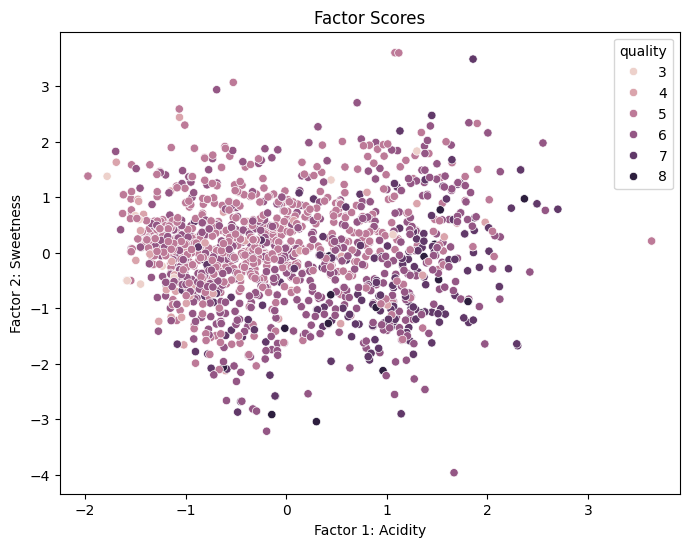

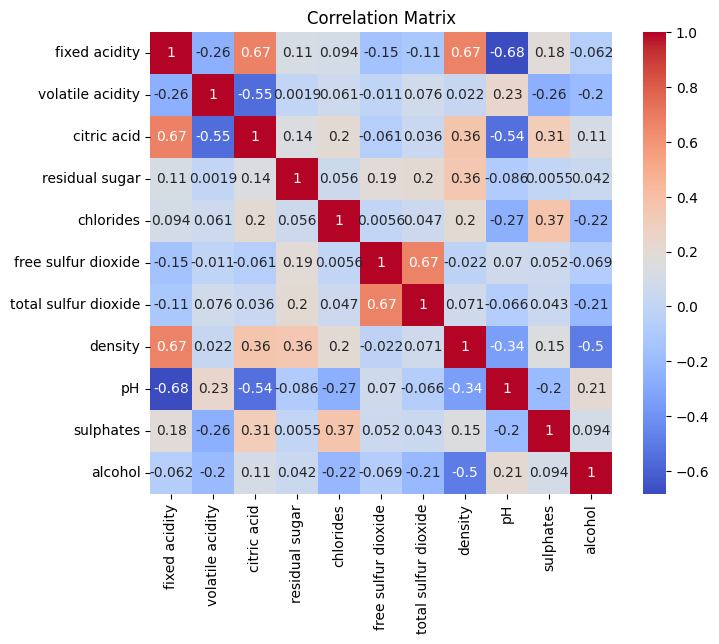

Feature names: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Factors and their Features:
Factor 1: Acidity: ['fixed acidity', 'volatile acidity', 'citric acid']
Factor 2: Sweetness: ['density', 'alcohol']
Factor 3: Oxidation: ['free sulfur dioxide', 'total sulfur dioxide']
Factor 4: Density and pH: ['chlorides']


In [21]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
print(f"Total features(observed variables): {df.columns}")
# Drop quality column (target variable)
df_fa = df.drop('quality', axis=1)

# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df_fa)

# Print factor loadings
print("Factor Loadings:")
print(fa.loadings_)

# Print communalities (proportion of variance explained)
print("\nCommunalities:")
print(fa.get_communalities())

# Transform data into factor scores
factor_scores = fa.transform(df_fa)

# Plot factor scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=factor_scores[:, 0], y=factor_scores[:, 1], hue=df['quality'])
plt.xlabel('Factor 1: Acidity')
plt.ylabel('Factor 2: Sweetness')
plt.title('Factor Scores')
plt.show()

# Correlation matrix heatmap
corr_matrix = df_fa.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


# Factor Interpretation
factor_loadings = fa.loadings_
feature_names = df_fa.columns
print(f"Feature names: {feature_names}")
# Define factors and their corresponding features
factors = {
    'Factor 1: Acidity': [],
    'Factor 2: Sweetness': [],
    'Factor 3: Oxidation': [],
    'Factor 4: Density and pH': []
}

for i, feature in enumerate(feature_names):
    loadings = factor_loadings[i]
    max_loading = max(abs(loadings))
    if max_loading > 0.5:  # threshold for significant loading
        factor_index = np.argmax(abs(loadings)) + 1
        if factor_index == 1:
            factors['Factor 1: Acidity'].append(feature)
        elif factor_index == 2:
            factors['Factor 2: Sweetness'].append(feature)
        elif factor_index == 3:
            factors['Factor 3: Oxidation'].append(feature)
        elif factor_index == 4:
            factors['Factor 4: Density and pH'].append(feature)


# Print factors and their features
print("\nFactors and their Features:")
for factor, features in factors.items():
    print(f"{factor}: {features}")


#**Tips:**
1. Choose the optimal number of factors (n_factors) based on your data and research question.
2. Experiment with different rotation methods (e.g., rotation='varimax') for simpler factor structures.
3. Interpret factor loadings, communalities, and uniqueness to understand the underlying factors.


##**What is Factor Analysis?**
Factor analysis is a statistical technique that helps:
1. Reduce large datasets into smaller, more manageable pieces.
2. Identify hidden patterns and relationships among variables.
3. Understand what underlying factors influence the data.
##**Key Concepts:**
1. Observed Variables: The original data points (e.g., exam scores, survey responses).
2. Factors: Underlying, invisible variables that explain the relationships among observed variables (e.g., intelligence, attitude).
3. Factor Loadings: Measure how strongly observed variables relate to factors.
##**How it Works:**
1. Identify correlations among observed variables.
2. Group highly correlated variables together.
3. Identify underlying factors that explain these correlations.
##**Example:**
Suppose we analyze student performance data:

Observed Variables: Math score, Science score, English score

**Factor Analysis reveals:**
1. Factor 1: Academic Ability (highly correlated with Math, Science, and English scores)
**Result:**

We've reduced 3 observed variables to 1 underlying factor (Academic Ability), making it easier to understand the data and identify patterns.

**Goal:**
Factor analysis simplifies complex data, revealing hidden structures and relationships, and helping researchers and analysts make informed decisions.
